In [1]:
import json
import shutil
import urllib

#from google.colab import drive
import csv
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from torch.nn import LSTM
from torch_geometric_temporal.signal import StaticGraphTemporalSignal
from torch_geometric_temporal.nn.recurrent import GConvLSTM
from torch_geometric_temporal.signal import temporal_signal_split

from evaluation import Evaluation
from gconvlstm_lstm_model import LSTMSequenceModel
from data_loder import DatasetLoader

In [2]:
is_training = True

# Loading previous model 

In [3]:
def load_model(model_name:str):
    # Opening JSON file
    with open("" + str(model_name)+".json", 'r') as openfile:

      # Reading from json file()
      param = json.load(openfile)

    # The model from file to code
    model = LSTMSequenceModel(**param)
    model.load_state_dict(torch.load("" + model_name))
    model.eval()

    return model, param

In [4]:
model_n = 'Model5'
# model_n2 = 'Model14'      # name the use model
# model_n3 = 'Model24'       # name the use model
# model_n4 = 'Model34'

data_n = "data.csv"     # the data file name
d_slice = (20080,20200)    # end <=25153  2006.02.10. = 20080

In [5]:
model, model_param=load_model(model_n)

In [6]:
# model2, model_param2=load_model(model_n2)
# model3, model_param3=load_model(model_n3)
# model4, model_param4=load_model(model_n4)

# Evaluation the loded model on new data¶

In [6]:
eval =  Evaluation(model,
                   model_n = model_n,
                       model_params=model_param, 
                       data_params=model_param["data_params"],
                       file_name=data_n, 
                       data_slice=d_slice)

In [ ]:


eval2 =  Evaluation(model2,
                    model_n =model_n2,
                       model_params=model_param2, 
                       data_params=model_param2["data_params"],
                       file_name=data_n, 
                       data_slice=d_slice)

eval3 =  Evaluation(model3,
                    model_n =model_n3,
                       model_params=model_param3, 
                       data_params=model_param2["data_params"],
                       file_name=data_n, 
                       data_slice=d_slice)

eval4 =  Evaluation(model4,
                    model_n =model_n4,
                       model_params=model_param4, 
                       data_params=model_param2["data_params"],
                       file_name=data_n, 
                       data_slice=d_slice)

In [7]:
MAE1,MRSE1, R1, W1 = eval.errors()
# MAE2,MRSE2, R2, W2 = eval2.errors()
# MAE3,MRSE3, R3, W3 = eval3.errors()
# MAE4,MRSE4, R4, W4 = eval4.errors()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create the data arrays


df1 = pd.DataFrame({str(model_n): np.array(MAE1), 
#                    str(model_n2): np.array(MAE2),
#                    str(model_n3): np.array(MAE3),
#                     str(model_n4): np.array(MAE4)
                   }, 
                  index = ['1d', '2d', '3d', '4d', '5d', '6d', '7d'])


In [10]:
df2 = pd.DataFrame({str(model_n): np.array(MRSE1), 
#                    str(model_n2): np.array(MRSE2),
#                    str(model_n3): np.array(MRSE3),
#                     str(model_n4): np.array(MRSE4)
                  }, 
                  index = ['1d', '2d', '3d', '4d', '5d', '6d', '7d'])


df3 = pd.DataFrame({str(model_n): np.array(R1), 
#                    str(model_n2): np.array(R2),
#                    str(model_n3): np.array(R3),
#                     str(model_n4): np.array(R4)
                  }, 
                  index = ['1d', '2d', '3d', '4d', '5d', '6d', '7d'])

df4 = pd.DataFrame({str(model_n): np.array(W1), 
#                    str(model_n2): np.array(W2),
#                    str(model_n3): np.array(W3),
#                     str(model_n4): np.array(W4)
                  }, 
                  index = ['1d', '2d', '3d', '4d', '5d', '6d', '7d'])

Text(0.5, 0.01, 'day')

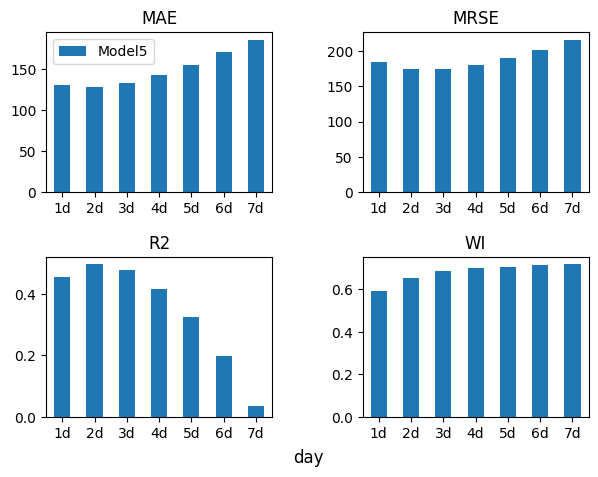

In [12]:
import matplotlib.pyplot as plt

#define subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,5))

#add DataFrames to subplots
df1.plot.bar(ax=axes[0,0], rot=0, title='MAE')
df2.plot.bar(ax=axes[0,1], rot=0, title='MRSE', legend =False)
df3.plot.bar(ax=axes[1,0], rot=0, title='R2', legend =False)
df4.plot.bar(ax=axes[1,1], rot=0, title='WI', legend =False)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.supxlabel('day')

#plt.savefig('barplot2.pdf')

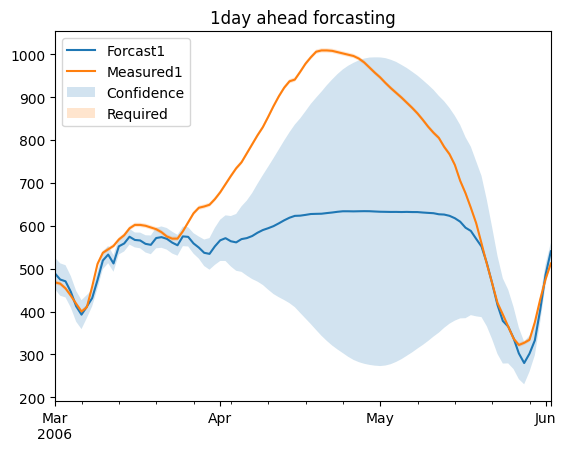

<module 'matplotlib.pyplot' from '/home/zsvizi/workspace/LSTMGConv/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [16]:
eval.plot(day=1, verbose= True)


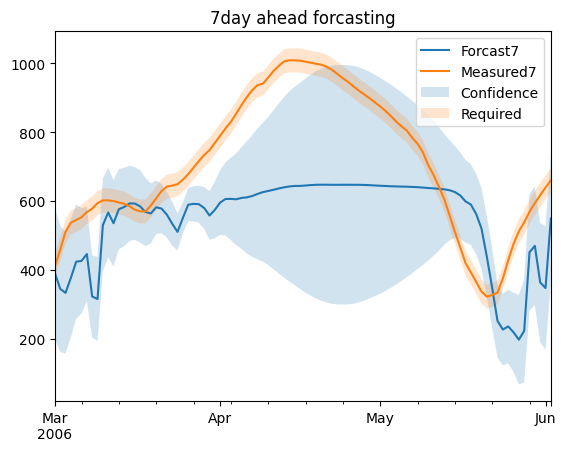

<module 'matplotlib.pyplot' from '/home/zsvizi/workspace/LSTMGConv/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [17]:
eval.plot(day=7, verbose= True)
